###  First, I will visualize both data set.

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lr_debug import *
import matplotlib.animation as animation


def visualize_dataset(filename):
    """ visualize the dataset"""
    X, Y = load_data(filename)
    X_ = X[:, 1:, ]

    X_positive = X_[np.where(Y == 1)]  # split the neg and pos data point for scatter
    X_negative = X_[np.where(Y == -1)]

    plt.figure()
    plt.scatter(X_positive[:, 0], X_positive[:, 1], c='r', label='Positive Points')
    plt.scatter(X_negative[:, 0], X_negative[:, 1], c='g', label='Negative Points')
    plt.legend(loc='lower center', shadow=True)
    plt.title(filename)
    plt.savefig(filename[:-4] + '_distribution.png', format='png')

<IPython.core.display.Javascript object>


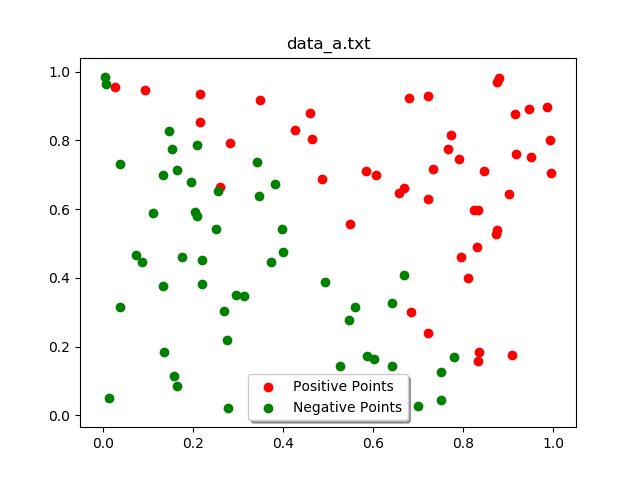

<IPython.core.display.Javascript object>


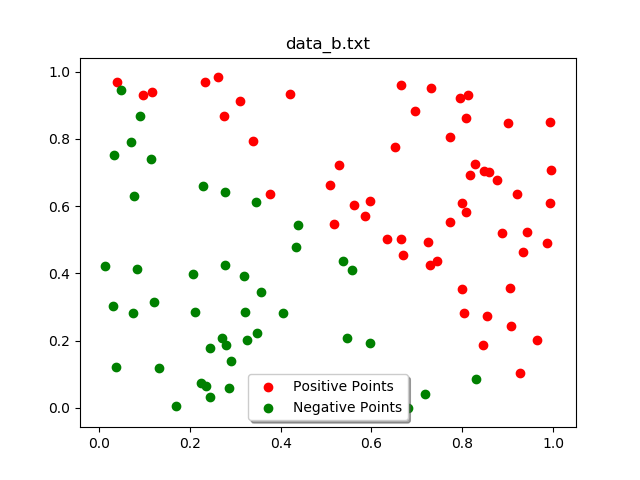

In [2]:
visualize_dataset('data_a.txt')
visualize_dataset('data_b.txt')  # first visualize the two data set
plt.show()

### Next, I will visualize the seperable line. We should first modify the original logistic regression function to return the learned  parameters during  training.

In [5]:
def get_theta_mistakes_pairs(X, Y, verbose=False):
    '''get thetas as the training history'''
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10
    theta_mistakes_pairs = []
    loss_history = []
    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad, mistakes = calc_grad(X, Y, theta)
        theta = theta - learning_rate * (grad)
        if i % 1000 == 0:
            if verbose:
                print('----------------------Finished %d iterations' % i, '-------------------')
                print('theta: ', theta)
                print('k, b:', theta[1] / theta[2] ,',',theta[0] / theta[2])
                print('mistakes: \n', mistakes)
                print('gradient:', grad)
            theta_mistakes_pairs.append((theta, mistakes))
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            if verbose:
                print('Converged in %d iterations' % i)
            theta_mistakes_pairs.append((theta, mistakes))
            break
        if i > 86000:
            if verbose:
                print('The iterations ${0} took too long to achieve convergence'.format(i))
                theta_mistakes_pairs.append((theta,mistakes))
                break
    return theta_mistakes_pairs


### Animate the training process for dataset A.

<IPython.core.display.Javascript object>


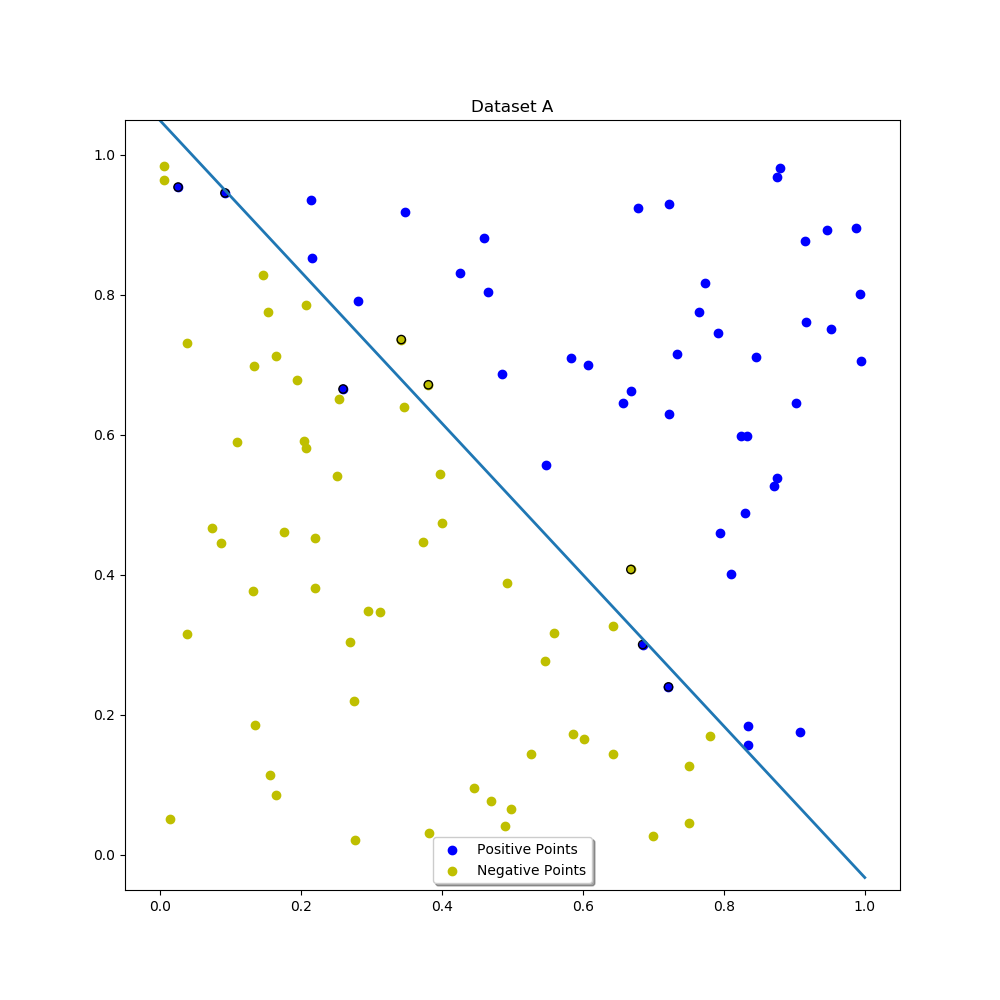

----------------------Finished 1000 iterations -------------------
theta:  [-18.08208709  18.63357323  17.165251  ]
k, b: 1.0855403885224841 , -1.0534123323679887
mistakes: 
 [[0.02533909 0.95414195]
 [0.38054846 0.67176232]
 [0.34210347 0.73631926]
 [0.68475891 0.30057825]
 [0.66802402 0.40790567]
 [0.72141539 0.24011914]
 [0.25954607 0.66569037]
 [0.09187705 0.94577294]]
gradient: [ 0.00031684 -0.00032739 -0.00031134]
----------------------Finished 2000 iterations -------------------
theta:  [-19.87663312  20.48617182  18.92951234]
k, b: 1.0822345262076103 , -1.050034082551628
mistakes: 
 [[0.02533909 0.95414195]
 [0.38054846 0.67176232]
 [0.34210347 0.73631926]
 [0.68475891 0.30057825]
 [0.66802402 0.40790567]
 [0.72141539 0.24011914]
 [0.25954607 0.66569037]
 [0.09187705 0.94577294]]
gradient: [ 9.51557791e-05 -9.81459110e-05 -9.35895742e-05]
----------------------Finished 3000 iterations -------------------
theta:  [-20.46605876  21.09394699  19.50930139]
k, b: 1.0812251331125025 

----------------------Finished 25000 iterations -------------------
theta:  [-20.81437788  21.45295159  19.85198176]
k, b: 1.0806453406304275 , -1.0484785916651904
mistakes: 
 [[0.02533909 0.95414195]
 [0.38054846 0.67176232]
 [0.34210347 0.73631926]
 [0.68475891 0.30057825]
 [0.66802402 0.40790567]
 [0.72141539 0.24011914]
 [0.25954607 0.66569037]
 [0.09187705 0.94577294]]
gradient: [ 2.63682990e-14 -2.71286562e-14 -2.58612306e-14]
----------------------Finished 26000 iterations -------------------
theta:  [-20.81437788  21.45295159  19.85198176]
k, b: 1.0806453406301486 , -1.048478591664921
mistakes: 
 [[0.02533909 0.95414195]
 [0.38054846 0.67176232]
 [0.34210347 0.73631926]
 [0.68475891 0.30057825]
 [0.66802402 0.40790567]
 [0.72141539 0.24011914]
 [0.25954607 0.66569037]
 [0.09187705 0.94577294]]
gradient: [ 1.02249120e-14 -1.04200367e-14 -1.00405922e-14]
----------------------Finished 27000 iterations -------------------
theta:  [-20.81437788  21.45295159  19.85198176]
k, b: 1.08

In [6]:
plt.cla()
plt.clf()
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(0.03, 1.03), ylim=(-0.03, 1.03))

X, Y = load_data('data_a.txt')
theta_mistakes_pairs = get_theta_mistakes_pairs(X, Y, verbose=True)

# plot data points
X_ = X[:, 1:, ]

X_positive = X_[np.where(Y == 1)]  # split the neg and pos data point for scatter
X_negative = X_[np.where(Y == -1)]


ax.scatter(X_positive[:, 0], X_positive[:, 1], c='b', label='Positive Points')
ax.scatter(X_negative[:, 0], X_negative[:, 1], c='y', label='Negative Points')
plt.legend(loc='lower center', shadow=True)
plt.title('Dataset A')

line, = ax.plot([], [], lw=2)
mistakes_points = ax.scatter([], [], edgecolors='black', facecolors='none')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    mistakes_points.set_offsets([])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    return [line, mistakes_points]

# animation function.  This is called sequentially
def animate(theta_mistakes_pair):
    theta = theta_mistakes_pair[0]
    mistakes = theta_mistakes_pair[1]
    c = theta[0]
    a = theta[1]
    b = theta[2]

    def y(x):
        return - a / b * x - c / b
    x = np.linspace(0, 1, 1000)
    line.set_data(x, y(x))
    mistakes_points.set_offsets(mistakes)
    return [line, mistakes_points]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim1 = animation.FuncAnimation(fig, animate, init_func=init, frames=theta_mistakes_pairs, interval=20, blit=True)
plt.show()

## Animate the training process for data set b

<IPython.core.display.Javascript object>


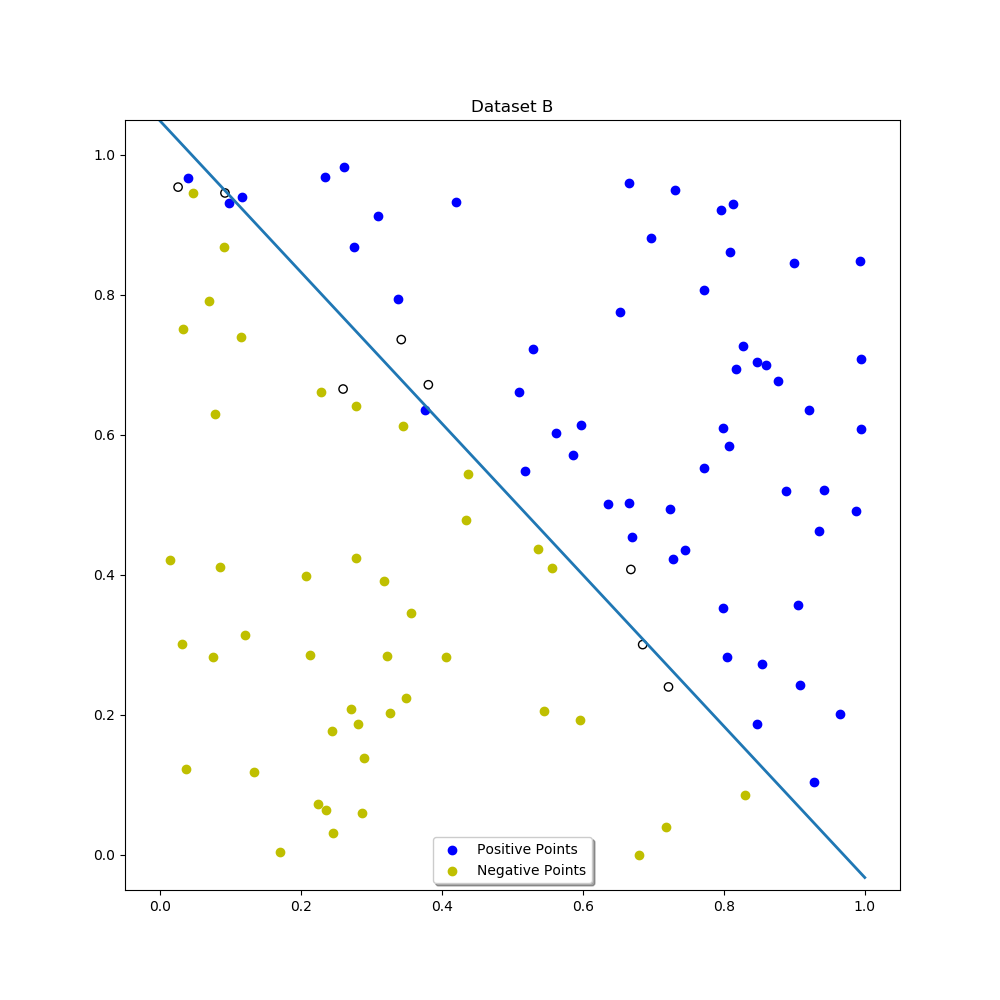

----------------------Finished 1000 iterations -------------------
theta:  [-23.01291845  23.44538711  22.8469457 ]
k, b: 1.0261934972295514 , -1.0072645489770846
mistakes: 
 []
gradient: [ 0.00082488 -0.00080613 -0.00082882]
----------------------Finished 2000 iterations -------------------
theta:  [-29.47981945  29.79815256  29.34541311]
k, b: 1.0154279462024258 , -1.004580148102852
mistakes: 
 []
gradient: [ 0.00052607 -0.00051919 -0.00052857]
----------------------Finished 3000 iterations -------------------
theta:  [-34.07562279  34.34525122  33.96221246]
k, b: 1.0112783805751655 , -1.0033393090899398
mistakes: 
 []
gradient: [ 0.00040676 -0.00040332 -0.00040854]
----------------------Finished 4000 iterations -------------------
theta:  [-37.78264684  38.02574926  37.68482356]
k, b: 1.0090467637174876 , -1.0025958268936983
mistakes: 
 []
gradient: [ 0.00034005 -0.000338   -0.00034143]
----------------------Finished 5000 iterations -------------------
theta:  [-40.95135723  41.1777

----------------------Finished 42000 iterations -------------------
theta:  [-89.26272215  89.4296345   89.29546053]
k, b: 1.0015025844359335 , -0.9996333701100506
mistakes: 
 []
gradient: [ 7.64714712e-05 -7.65702773e-05 -7.65400682e-05]
----------------------Finished 43000 iterations -------------------
theta:  [-90.02127803  90.18920608  90.05467754]
k, b: 1.0014938539079525 , -0.9996291196014405
mistakes: 
 []
gradient: [ 7.52487511e-05 -7.53530412e-05 -7.53124262e-05]
----------------------Finished 44000 iterations -------------------
theta:  [-90.76783704  90.93683454  90.80184968]
k, b: 1.0014865870829137 , -0.9996254190988708
mistakes: 
 []
gradient: [ 7.40716009e-05 -7.41811604e-05 -7.41305940e-05]
----------------------Finished 45000 iterations -------------------
theta:  [-91.50284169  91.6729603   91.53742178]
k, b: 1.001480689775152 , -0.9996222300914874
mistakes: 
 []
gradient: [ 7.29374178e-05 -7.30520427e-05 -7.29919546e-05]
----------------------Finished 46000 iteratio

----------------------Finished 84000 iterations -------------------
theta:  [-114.09158773  114.33123202  114.12757774]
k, b: 1.0017844440878936 , -0.9996846510414026
mistakes: 
 []
gradient: [ 4.73255939e-05 -4.75448305e-05 -4.72995358e-05]
----------------------Finished 85000 iterations -------------------
theta:  [-114.56289818  114.80474127  114.59862345]
k, b: 1.0017986064080886 , -0.9996882574038478
mistakes: 
 []
gradient: [ 4.69381882e-05 -4.71587026e-05 -4.69113043e-05]
----------------------Finished 86000 iterations -------------------
theta:  [-115.03037334  115.2744278   115.06582578]
k, b: 1.0018128929482513 , -0.9996918943520293
mistakes: 
 []
gradient: [ 4.65584892e-05 -4.67802396e-05 -4.65308107e-05]
The iterations $86001 took too long to achieve convergence


In [7]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(xlim=(0.03, 1.03), ylim=(-0.03, 1.03))

X, Y = load_data('data_b.txt')
theta_mistakes_pairs = get_theta_mistakes_pairs(X, Y, verbose= True)

# plot data points
X_ = X[:, 1:, ]

X_positive = X_[np.where(Y == 1)]  # split the neg and pos data point for scatter
X_negative = X_[np.where(Y == -1)]

ax.scatter(X_positive[:, 0], X_positive[:, 1], c='b', label='Positive Points')
ax.scatter(X_negative[:, 0], X_negative[:, 1], c='y', label='Negative Points')
plt.legend(loc='lower center', shadow=True)
plt.title('Dataset B')

line, = ax.plot([], [], lw=2)
mistakes_points = ax.scatter([], [], edgecolors='black', facecolors='none')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    mistakes_points.set_offsets([])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    return [line, mistakes_points]

# animation function.  This is called sequentially
def animate(theta_mistakes_pair):
    theta = theta_mistakes_pair[0]
    mistakes = theta_mistakes_pair[1]
    c = theta[0]
    a = theta[1]
    b = theta[2]

    def y(x):
        return - a / b * x - c / b
    x = np.linspace(0, 1, 1000)
    line.set_data(x, y(x))
    mistakes_points.set_offsets(mistakes)
    return [line, mistakes_points]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig, animate, init_func=init, frames=theta_mistakes_pairs, interval=20, blit=True)
plt.show()

# 1(c)
### First predict for each modificatin with justification and then experiment.

## 1(c),i
### This wont help. Because if we slow the learning rate then to achieve the none-mistake sperating line, the algorithms will take more iterations than the current learning rate. If we  accelerate the learning rate, after achieving the none-mistakes sperating line, the algorithm will not be stable since the current learning rate has already overshoot the line between edges of the falt discontinuity. 

<IPython.core.display.Javascript object>


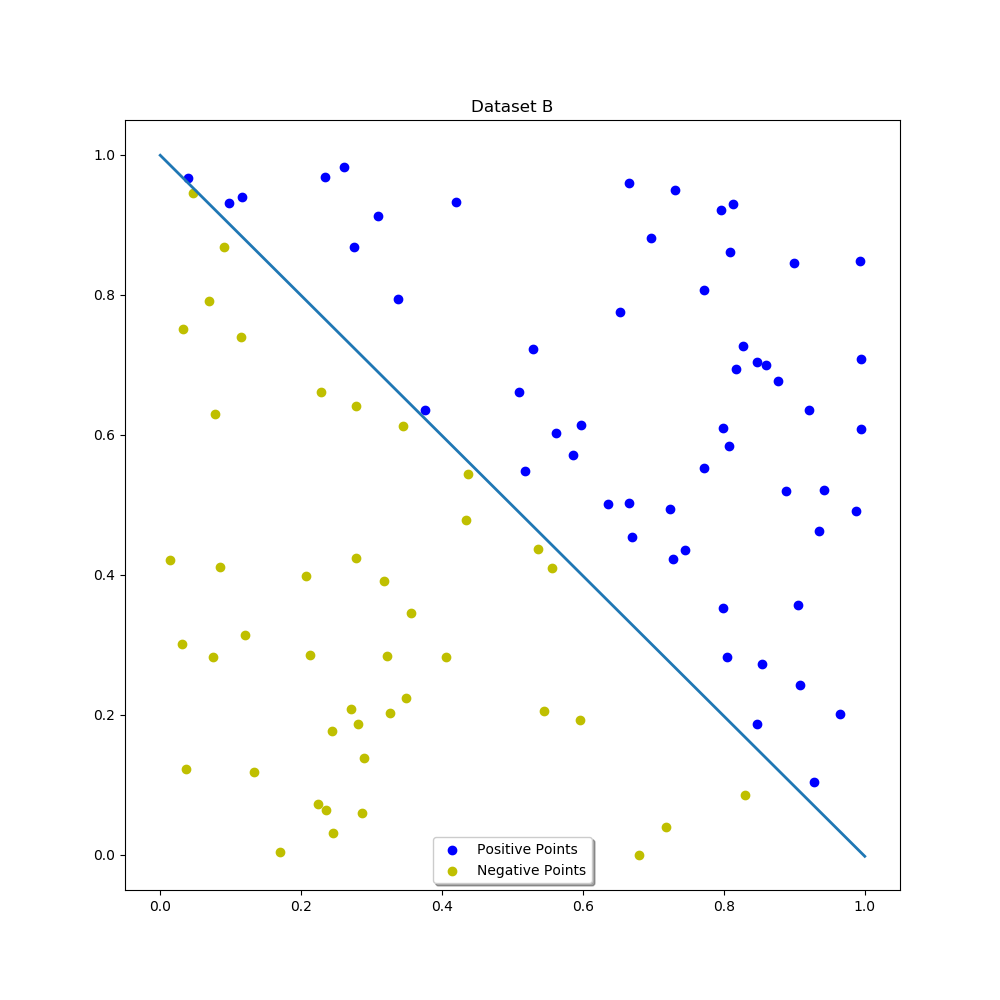

The iterations $86001 took too long to achieve convergence


In [21]:
# learning rate
learning_rate = 12



def get_theta_mistakes_pairs(X, Y, verbose=False, learning_rate=10):
    '''get thetas as the training history'''
    m, n = X.shape
    theta = np.zeros(n)
    theta_mistakes_pairs = []
    loss_history = []
    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad, mistakes = calc_grad(X, Y, theta)
        theta = theta - learning_rate * (grad)
        if i % 1000 == 0:
            if verbose:
                print('----------------------Finished %d iterations' % i, '-------------------')
                print('theta: ', theta)
                print('k, b:', theta[1] / theta[2] ,',',theta[0] / theta[2])
                print('mistakes: \n', mistakes)
                print('gradient:', grad)
            theta_mistakes_pairs.append((theta, mistakes))
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            theta_mistakes_pairs.append((theta, mistakes))
            break
        if i > 86000:
            if verbose:
                theta_mistakes_pairs.append((theta,mistakes))
            print('The iterations ${0} took too long to achieve convergence'.format(i))
            break
    return theta_mistakes_pairs

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(xlim=(0.03, 1.03), ylim=(-0.03, 1.03))

X, Y = load_data('data_b.txt')
theta_mistakes_pairs = get_theta_mistakes_pairs(X, Y, learning_rate=learning_rate, verbose=False,)

# plot data points
X_ = X[:, 1:, ]

X_positive = X_[np.where(Y == 1)]  # split the neg and pos data point for scatter
X_negative = X_[np.where(Y == -1)]

ax.scatter(X_positive[:, 0], X_positive[:, 1], c='b', label='Positive Points')
ax.scatter(X_negative[:, 0], X_negative[:, 1], c='y', label='Negative Points')
plt.legend(loc='lower center', shadow=True)
plt.title('Dataset B')

line, = ax.plot([], [], lw=2)
mistakes_points = ax.scatter([], [], edgecolors='black', facecolors='none')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    mistakes_points.set_offsets([])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    return [line, mistakes_points]

# animation function.  This is called sequentially
def animate(theta_mistakes_pair):
    theta = theta_mistakes_pair[0]
    mistakes = theta_mistakes_pair[1]
    c = theta[0]
    a = theta[1]
    b = theta[2]

    def y(x):
        return - a / b * x - c / b
    x = np.linspace(0, 1, 1000)
    line.set_data(x, y(x))
    mistakes_points.set_offsets(mistakes)
    return [line, mistakes_points]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig, animate, init_func=init, frames=theta_mistakes_pairs, interval=20, blit=True)
plt.show()

# 1(c).ii.
## decrease the the learning rate over time

<IPython.core.display.Javascript object>


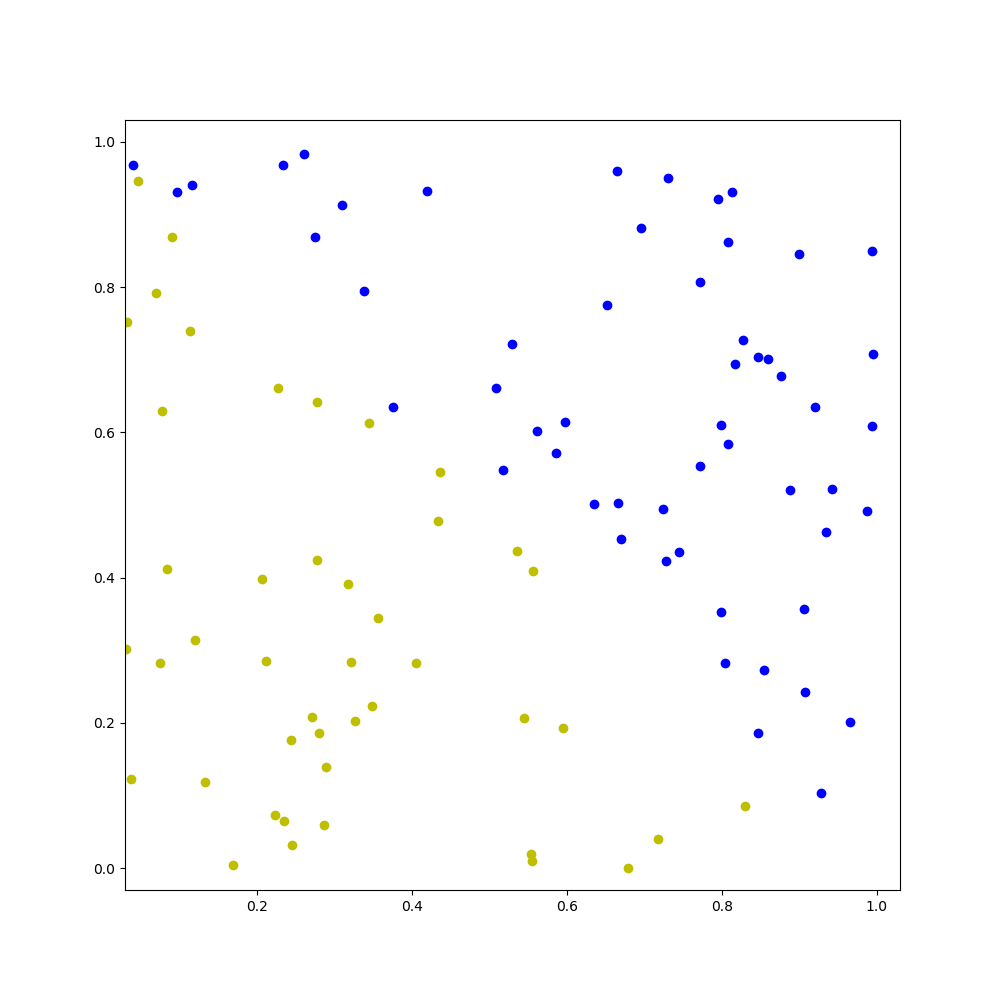

Converged in 29 iterations
number of mistakes: 7


In [23]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lr_debug import *
import matplotlib.animation as animation

# learning rate
learning_rate = 100



def get_theta_mistakes_pairs(X, Y, verbose=False, learning_rate=10):
    '''get thetas as the training history'''
    m, n = X.shape
    theta = np.zeros(n)
    theta_mistakes_pairs = []
    loss_history = []
    i = 0
    while True:
        i += 1
        learning_rate = learning_rate / np.sqrt(i)
        prev_theta = theta
        grad, mistakes = calc_grad(X, Y, theta)
        theta = theta - learning_rate * (grad)
        if i % 1000 == 0:
            if verbose:
                print('----------------------Finished %d iterations' % i, '-------------------')
                print('theta: ', theta)
                print('k, b:', theta[1] / theta[2] ,',',theta[0] / theta[2])
                print('mistakes: \n', mistakes)
                print('gradient:', grad)
            theta_mistakes_pairs.append((theta, mistakes))
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            theta_mistakes_pairs.append((theta, mistakes))
            print('number of mistakes:', len(mistakes))
            break
        if i > 86000:
            if verbose:
                theta_mistakes_pairs.append((theta,mistakes))
            print('The iterations ${0} took too long to achieve convergence'.format(i))
            break
    return theta_mistakes_pairs

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(xlim=(0.03, 1.03), ylim=(-0.03, 1.03))

X, Y = load_data('data_b.txt')
theta_mistakes_pairs = get_theta_mistakes_pairs(X, Y, learning_rate=learning_rate, verbose=False,)

# plot data points
X_ = X[:, 1:, ]

X_positive = X_[np.where(Y == 1)]  # split the neg and pos data point for scatter
X_negative = X_[np.where(Y == -1)]

ax.scatter(X_positive[:, 0], X_positive[:, 1], c='b', label='Positive Points')
ax.scatter(X_negative[:, 0], X_negative[:, 1], c='y', label='Negative Points')
plt.legend(loc='lower center', shadow=True)
plt.title('Dataset B')

line, = ax.plot([], [], lw=2)
mistakes_points = ax.scatter([], [], edgecolors='black', facecolors='none')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    mistakes_points.set_offsets([])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    return [line, mistakes_points]

# animation function.  This is called sequentially
def animate(theta_mistakes_pair):
    theta = theta_mistakes_pair[0]
    mistakes = theta_mistakes_pair[1]
    c = theta[0]
    a = theta[1]
    b = theta[2]

    def y(x):
        return - a / b * x - c / b
    x = np.linspace(0, 1, 1000)
    line.set_data(x, y(x))
    mistakes_points.set_offsets(mistakes)
    return [line, mistakes_points]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig, animate, init_func=init, frames=theta_mistakes_pairs, interval=20, blit=True)
plt.show()

# 1(c), iii
## add a regularization term

<IPython.core.display.Javascript object>


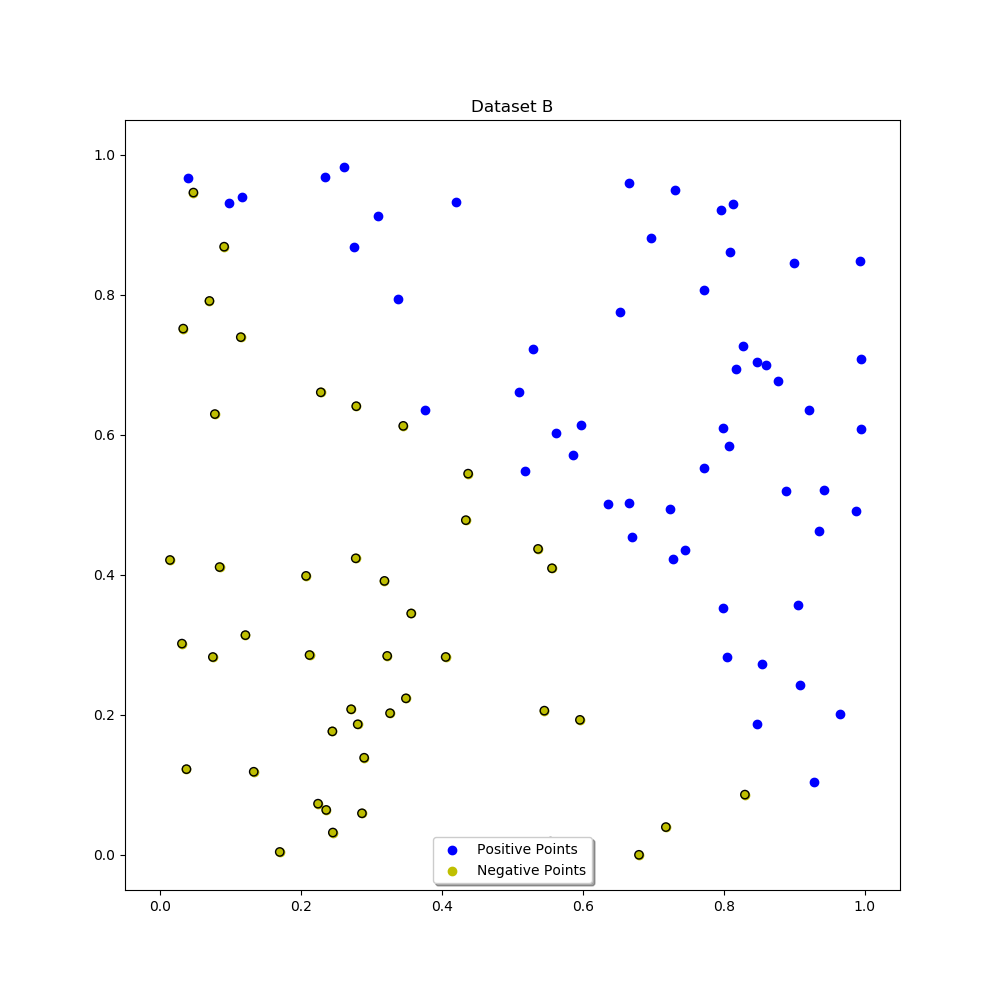

/home/bryan/Coding/CS299/assignment_2/lr_debug.py:30: RuntimeWarning: overflow encountered in exp
  probs = 1. / (1 + np.exp(margins))
/home/bryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply
/home/bryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/home/bryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in subtract


The iterations $86001 took too long to achieve convergence


In [27]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lr_debug import *
import matplotlib.animation as animation

# learning rate
learning_rate = 10



def get_theta_mistakes_pairs(X, Y, verbose=False, learning_rate=10):
    '''get thetas as the training history'''
    m, n = X.shape
    theta = np.zeros(n)
    theta_mistakes_pairs = []
    loss_history = []
    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad, mistakes = calc_grad(X, Y, theta)
        grad = grad - 2* theta
        theta = theta - learning_rate * (grad)
        if i % 1000 == 0:
            if verbose:
                print('----------------------Finished %d iterations' % i, '-------------------')
                print('theta: ', theta)
                print('k, b:', theta[1] / theta[2] ,',',theta[0] / theta[2])
                print('mistakes: \n', mistakes)
                print('gradient:', grad)
            theta_mistakes_pairs.append((theta, mistakes))
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            theta_mistakes_pairs.append((theta, mistakes))
            print('number of mistakes:', len(mistakes))
            break
        if i > 86000:
            if verbose:
                theta_mistakes_pairs.append((theta,mistakes))
            print('The iterations ${0} took too long to achieve convergence'.format(i))
            break
    return theta_mistakes_pairs

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(xlim=(0.03, 1.03), ylim=(-0.03, 1.03))

X, Y = load_data('data_b.txt')
theta_mistakes_pairs = get_theta_mistakes_pairs(X, Y, learning_rate=learning_rate, verbose=False,)

# plot data points
X_ = X[:, 1:, ]

X_positive = X_[np.where(Y == 1)]  # split the neg and pos data point for scatter
X_negative = X_[np.where(Y == -1)]

ax.scatter(X_positive[:, 0], X_positive[:, 1], c='b', label='Positive Points')
ax.scatter(X_negative[:, 0], X_negative[:, 1], c='y', label='Negative Points')
plt.legend(loc='lower center', shadow=True)
plt.title('Dataset B')

line, = ax.plot([], [], lw=2)
mistakes_points = ax.scatter([], [], edgecolors='black', facecolors='none')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    mistakes_points.set_offsets([])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    return [line, mistakes_points]

# animation function.  This is called sequentially
def animate(theta_mistakes_pair):
    theta = theta_mistakes_pair[0]
    mistakes = theta_mistakes_pair[1]
    c = theta[0]
    a = theta[1]
    b = theta[2]

    def y(x):
        return - a / b * x - c / b
    x = np.linspace(0, 1, 1000)
    line.set_data(x, y(x))
    mistakes_points.set_offsets(mistakes)
    return [line, mistakes_points]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig, animate, init_func=init, frames=theta_mistakes_pairs, interval=20, blit=True)
plt.show()

# 1(c), iv

<IPython.core.display.Javascript object>


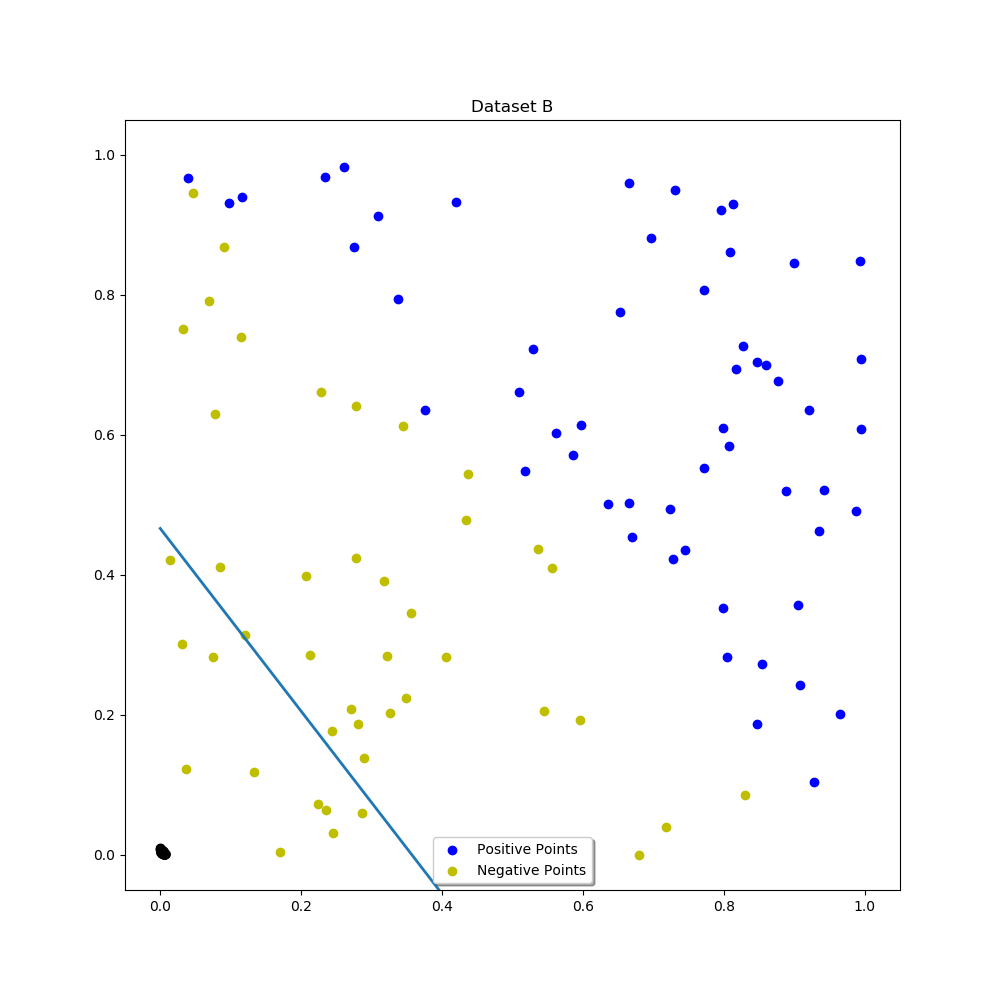

The iterations $86001 took too long to achieve convergence


In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lr_debug import *
import matplotlib.animation as animation

# learning rate
learning_rate = 10
alpha = 1e-2

def get_theta_mistakes_pairs(X, Y, verbose=False, learning_rate=10, alpha=0.5):
    '''get thetas as the training history'''
    m, n = X.shape
    theta = np.zeros(n)
    theta_mistakes_pairs = []
    loss_history = []
    i = 0
    X = alpha * X
    while True:
        i += 1
        prev_theta = theta
        grad, mistakes = calc_grad(X, Y, theta)
        theta = theta - learning_rate * (grad)
        if i % 1000 == 0:
            if verbose:
                print('----------------------Finished %d iterations' % i, '-------------------')
                print('theta: ', theta)
                print('k, b:', theta[1] / theta[2] ,',',theta[0] / theta[2])
                print('mistakes: \n', mistakes)
                print('gradient:', grad)
            theta_mistakes_pairs.append((theta, mistakes))
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            theta_mistakes_pairs.append((theta, mistakes))
            print('number of mistakes:', len(mistakes))
            break
        if i > 86000:
            if verbose:
                theta_mistakes_pairs.append((theta,mistakes))
            print('The iterations ${0} took too long to achieve convergence'.format(i))
            break
    return theta_mistakes_pairs

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(xlim=(0.03, 1.03), ylim=(-0.03, 1.03))

X, Y = load_data('data_b.txt')
theta_mistakes_pairs = get_theta_mistakes_pairs(X, Y, learning_rate=learning_rate, verbose=False, alpha=alpha)

# plot data points
X_ = X[:, 1:, ]

X_positive = X_[np.where(Y == 1)]  # split the neg and pos data point for scatter
X_negative = X_[np.where(Y == -1)]

ax.scatter(X_positive[:, 0], X_positive[:, 1], c='b', label='Positive Points')
ax.scatter(X_negative[:, 0], X_negative[:, 1], c='y', label='Negative Points')
plt.legend(loc='lower center', shadow=True)
plt.title('Dataset B')

line, = ax.plot([], [], lw=2)
mistakes_points = ax.scatter([], [], edgecolors='black', facecolors='none')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    mistakes_points.set_offsets([])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    return [line, mistakes_points]

# animation function.  This is called sequentially
def animate(theta_mistakes_pair):
    theta = theta_mistakes_pair[0]
    mistakes = theta_mistakes_pair[1]
    c = theta[0]
    a = theta[1]
    b = theta[2]

    def y(x):
        return - a / b * x - c / b
    x = np.linspace(0, 1, 1000)
    line.set_data(x, y(x))
    mistakes_points.set_offsets(mistakes)
    return [line, mistakes_points]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig, animate, init_func=init, frames=theta_mistakes_pairs, interval=20, blit=True)
plt.show()

# 1(c), v

<IPython.core.display.Javascript object>


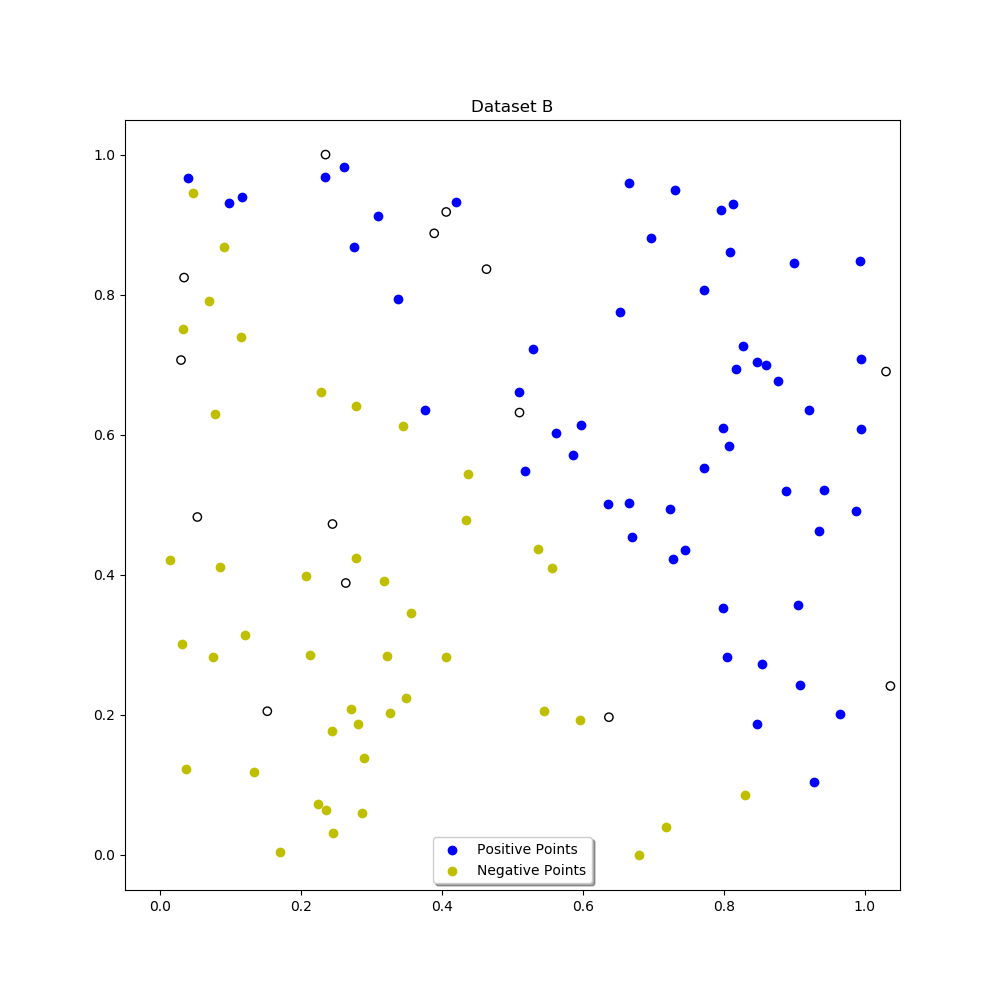

The iterations $86001 took too long to achieve convergence


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lr_debug import *
import matplotlib.animation as animation

# learning rate
learning_rate = 10



def get_theta_mistakes_pairs(X, Y, verbose=False, learning_rate=10):
    '''get thetas as the training history'''
    m, n = X.shape
    theta = np.zeros(n)
    theta_mistakes_pairs = []
    loss_history = []
    i = 0
    noise = np.random.normal(0, 1, X.shape)
    X  = noise + X
    while True:
        i += 1
        prev_theta = theta
        grad, mistakes = calc_grad(X, Y, theta)
        theta = theta - learning_rate * (grad)
        if i % 1000 == 0:
            if verbose:
                print('----------------------Finished %d iterations' % i, '-------------------')
                print('theta: ', theta)
                print('k, b:', theta[1] / theta[2] ,',',theta[0] / theta[2])
                print('mistakes: \n', mistakes)
                print('gradient:', grad)
            theta_mistakes_pairs.append((theta, mistakes))
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            theta_mistakes_pairs.append((theta, mistakes))
            print('number of mistakes:', len(mistakes))
            break
        if i > 86000:
            if verbose:
                theta_mistakes_pairs.append((theta,mistakes))
            print('The iterations ${0} took too long to achieve convergence'.format(i))
            break
    return theta_mistakes_pairs

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(xlim=(0.03, 1.03), ylim=(-0.03, 1.03))

X, Y = load_data('data_b.txt')
theta_mistakes_pairs = get_theta_mistakes_pairs(X, Y, learning_rate=learning_rate, verbose=False,)

# plot data points
X_ = X[:, 1:, ]

X_positive = X_[np.where(Y == 1)]  # split the neg and pos data point for scatter
X_negative = X_[np.where(Y == -1)]

ax.scatter(X_positive[:, 0], X_positive[:, 1], c='b', label='Positive Points')
ax.scatter(X_negative[:, 0], X_negative[:, 1], c='y', label='Negative Points')
plt.legend(loc='lower center', shadow=True)
plt.title('Dataset B')

line, = ax.plot([], [], lw=2)
mistakes_points = ax.scatter([], [], edgecolors='black', facecolors='none')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    mistakes_points.set_offsets([])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    return [line, mistakes_points]

# animation function.  This is called sequentially
def animate(theta_mistakes_pair):
    theta = theta_mistakes_pair[0]
    mistakes = theta_mistakes_pair[1]
    c = theta[0]
    a = theta[1]
    b = theta[2]

    def y(x):
        return - a / b * x - c / b
    x = np.linspace(0, 1, 1000)
    line.set_data(x, y(x))
    mistakes_points.set_offsets(mistakes)
    return [line, mistakes_points]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig, animate, init_func=init, frames=theta_mistakes_pairs, interval=20, blit=True)
plt.show()